In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score


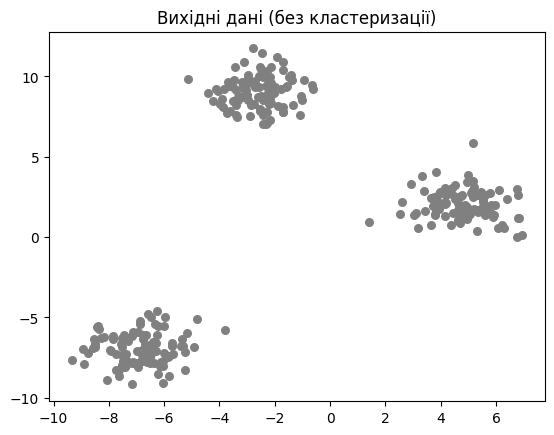

In [2]:
np.random.seed(42)
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=1.0, random_state=42)

plt.scatter(X[:, 0], X[:, 1], s=30, color='gray')
plt.title("Вихідні дані (без кластеризації)")
plt.show()


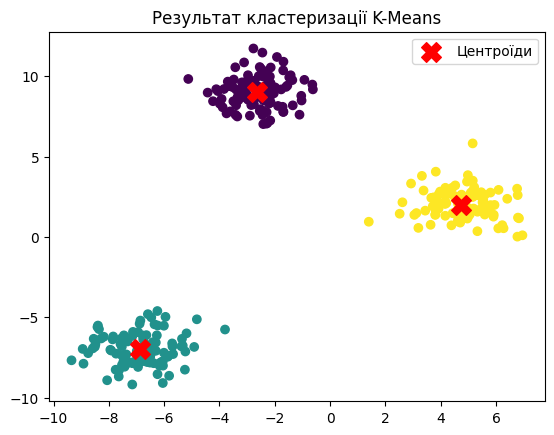

K-Means Silhouette Score: 0.8480303059596955


In [3]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_labels = kmeans.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=kmeans_labels, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c='red', s=200, marker='X', label='Центроїди')
plt.title("Результат кластеризації K-Means")
plt.legend()
plt.show()

print("K-Means Silhouette Score:", silhouette_score(X, kmeans_labels))


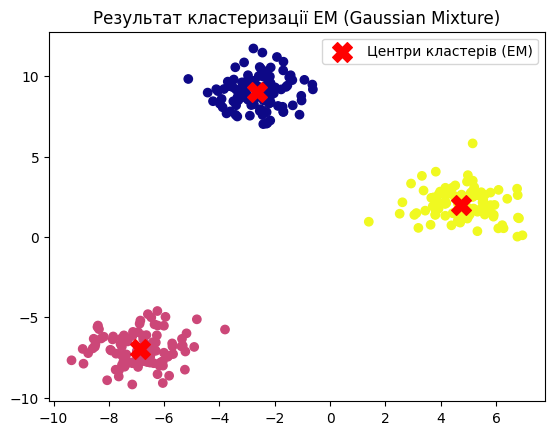

EM (Gaussian Mixture) Silhouette Score: 0.8480303059596955


In [4]:
em = GaussianMixture(n_components=3, random_state=42)
em_labels = em.fit_predict(X)

plt.scatter(X[:, 0], X[:, 1], c=em_labels, cmap='plasma')
plt.scatter(em.means_[:, 0], em.means_[:, 1], c='red', s=200, marker='X', label='Центри кластерів (EM)')
plt.title("Результат кластеризації EM (Gaussian Mixture)")
plt.legend()
plt.show()

print("EM (Gaussian Mixture) Silhouette Score:", silhouette_score(X, em_labels))


In [5]:
results = pd.DataFrame({
    'Метод': ['K-Means', 'EM (Gaussian Mixture)'],
    'Silhouette Score': [
        silhouette_score(X, kmeans_labels),
        silhouette_score(X, em_labels)
    ]
})
print(results)


                   Метод  Silhouette Score
0                K-Means           0.84803
1  EM (Gaussian Mixture)           0.84803
